## SparkR - Exploratory Data Analysis on Weather Data

In [1]:
# Load SparkR library
library(SparkR, lib.loc = c(file.path(Sys.getenv("SPARK_HOME"), "R", "lib")))

Warning message:
"package 'SparkR' was built under R version 3.4.4"
Attaching package: 'SparkR'

The following objects are masked from 'package:stats':

    cov, filter, lag, na.omit, predict, sd, var, window

The following objects are masked from 'package:base':

    as.data.frame, colnames, colnames<-, drop, intersect, rank, rbind,
    sample, subset, summary, transform, union



In [2]:
# Start Spark session
sparkR.session(master="local[*]", sparkConfig=list(spark.driver.memory="2g"))

Spark package found in SPARK_HOME: /usr/local/spark-2.3.1-bin-hadoop2.6
Warning message in Filter(nzchar, unlist(strsplit(input, ",|\\s"))):
"bytecode version mismatch; using eval"

Launching java with spark-submit command /usr/local/spark-2.3.1-bin-hadoop2.6/bin/spark-submit   --driver-memory "2g" sparkr-shell /tmp/Rtmp5OoeAY/backend_port369e51a98326 


Java ref type org.apache.spark.sql.SparkSession id 1 

In [3]:
# Read data into a Spark dataframe
sdf <- read.df("daily_weather.csv", "csv", header="true", inferSchema="true") 

In [4]:
# Cache dataframe
cache(sdf)

SparkDataFrame[number:int, air_pressure_9am:double, air_temp_9am:double, avg_wind_direction_9am:double, avg_wind_speed_9am:double, max_wind_direction_9am:double, max_wind_speed_9am:double, rain_accumulation_9am:double, rain_duration_9am:double, relative_humidity_9am:double, relative_humidity_3pm:double]

In [5]:
# Examine schema
schema(sdf)

StructType
|-name = "number", type = "IntegerType", nullable = TRUE
|-name = "air_pressure_9am", type = "DoubleType", nullable = TRUE
|-name = "air_temp_9am", type = "DoubleType", nullable = TRUE
|-name = "avg_wind_direction_9am", type = "DoubleType", nullable = TRUE
|-name = "avg_wind_speed_9am", type = "DoubleType", nullable = TRUE
|-name = "max_wind_direction_9am", type = "DoubleType", nullable = TRUE
|-name = "max_wind_speed_9am", type = "DoubleType", nullable = TRUE
|-name = "rain_accumulation_9am", type = "DoubleType", nullable = TRUE
|-name = "rain_duration_9am", type = "DoubleType", nullable = TRUE
|-name = "relative_humidity_9am", type = "DoubleType", nullable = TRUE
|-name = "relative_humidity_3pm", type = "DoubleType", nullable = TRUE

In [6]:
# Show summary statistics
head(summary(sdf))

summary,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095,1092,1090,1091,1092,1092,1091,1089,1092,1095,1095
mean,547.0,918.8825513138094,64.93300141287072,142.2355107005759,5.50828424225493,148.95351796516923,7.019513529175272,0.20307895225211126,294.1080522756142,34.24140205923536,35.34472714825898
stddev,316.24357700987383,3.184161180386833,11.175514003175877,69.13785928889189,4.5528134655317185,67.23801294602953,5.598209170780958,1.5939521253574893,1598.0787786601481,25.472066802250055,22.524079453587273
min,0,907.9900000000024,36.752000000000685,15.500000000000046,0.69345139999974,28.89999999999991,1.1855782000000479,0.0,0.0,6.090000000001012,5.3000000000006855
25%,273,916.550000000009,57.272000000000354,65.88061551980813,2.2482786234616317,76.45666344425672,3.0646077999999797,0.0,0.0,15.090000000000687,17.390000000000576
50%,547,918.9020905167166,65.69599999999856,166.0,3.8699061999999844,177.09999999999994,4.943637399999937,0.0,0.0,23.179259298119568,24.380000000000344


In [7]:
# Get number of rows
nrow(sdf)

[1] 1095

In [8]:
# Show first few rows
head(sdf)

number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.0600,74.82200,271.1000,2.080354,295.4000,2.863283,0.00,0,42.4200,36.16000
1,917.3477,71.40384,101.9352,2.443009,140.4715,3.533324,0.00,0,24.3287,19.42660
2,923.0400,60.63800,51.0000,17.067852,63.7000,22.100967,0.00,20,8.9000,14.46000
3,920.5028,70.13889,198.8321,4.337363,211.2033,5.190045,0.00,0,12.1891,12.74255
4,921.1600,44.29400,277.8000,1.856660,136.5000,2.863283,8.90,14730,92.4100,76.74000
5,915.3000,78.40400,182.8000,9.932014,189.0000,10.983375,0.02,170,35.1300,33.93000


In [9]:
# Get column names
names(sdf)

[1] "number"                 "air_pressure_9am"       "air_temp_9am"          
 [4] "avg_wind_direction_9am" "avg_wind_speed_9am"     "max_wind_direction_9am"
 [7] "max_wind_speed_9am"     "rain_accumulation_9am"  "rain_duration_9am"     
[10] "relative_humidity_9am"  "relative_humidity_3pm"

In [10]:
# Get number of columns
ncol(sdf)

[1] 11

In [11]:
# Correlation between air_temp_9am and relative_humidity_9am 
corr(sdf, 'air_temp_9am', 'relative_humidity_9am', method = "pearson")

[1] -0.5366701

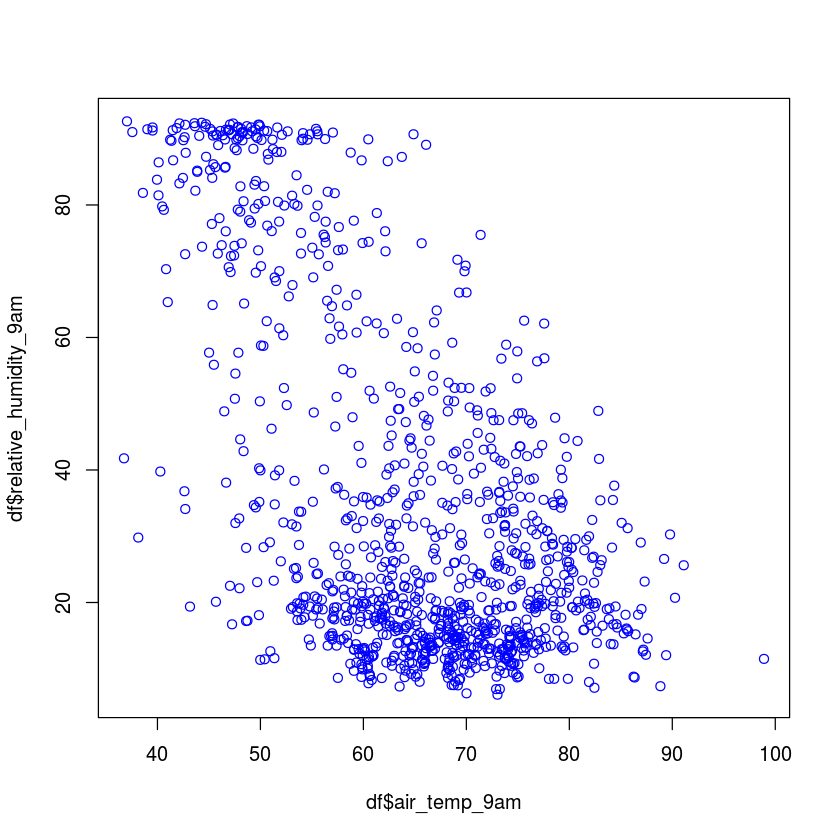

In [12]:
# Scatter plot of air_temp_9am and relative_humidity_9am 
df <- as.data.frame(sdf)
plot(df$air_temp_9am, df$relative_humidity_9am, col='blue')

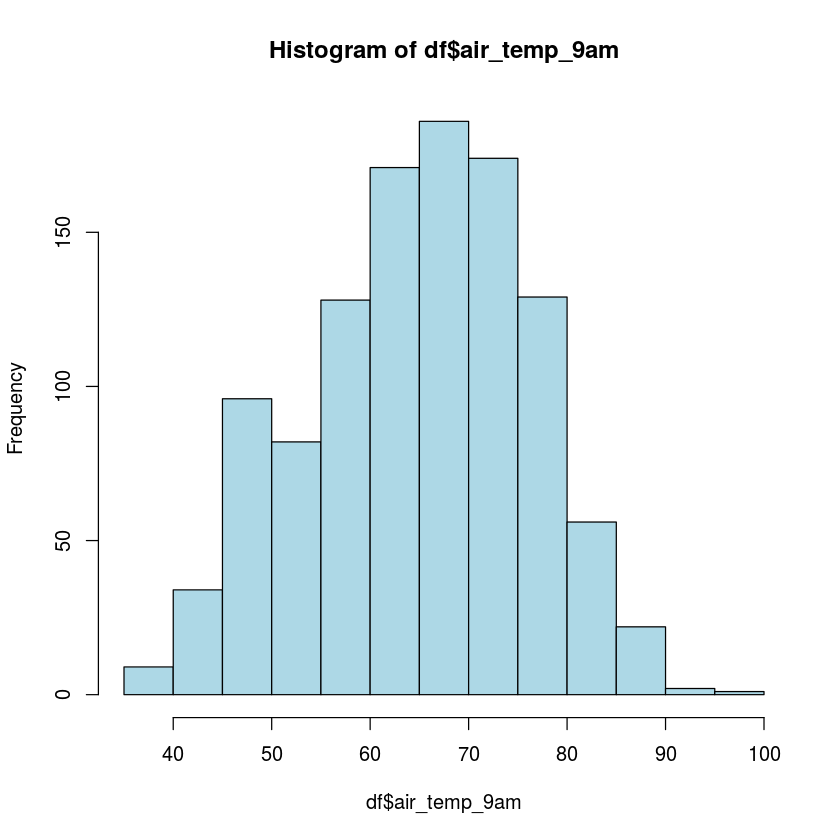

In [13]:
# Histogram of air_temp_9am
hist(df$air_temp_9am, col="lightblue")